# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For the Udacity Data Analyst Nano Degree project 2: investiagte a dataset, i have choosen the TMDB dataset out of the 5 dataset given. This data was originated from Kaggle, originally sourced from IMDB. In this project i will be cleaning and exploring the dataset, where questions below will be explored using some of the python tools learned from the class sessions, at the end i should be able to make sense of this data and answer these questions raised.


__Questions:__

which year most of the movies were released?

What are the High Budget Movies from year to year?

what is the runtime, popularity and budget trends over the years?

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After observing the dataset that it is relatively clean and proposed questions for the analysis i will be keeping only relevent data, deleting data i dont need so that i can make the data easy and understandable.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb_movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


An initial view of the data, its headings, rows and colums

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#   a view of datatypes for str stored as object.
print("I am imdb_id: ", type(df['imdb_id'][0]))
print("I am original_title: ", type(df['original_title'][0]))
print("I am cast: ", type(df['cast'][0]))
print("I am homepage: ", type(df['homepage'][0]))
print("I am director: ", type(df['director'][0]))
print("I am tagline: ", type(df['tagline'][0]))
print("I am keywords: ", type(df['keywords'][0]))
print("I am overview: ", type(df['overview'][0]))
print("I am genres: ", type(df['genres'][0]))
print("I am production_companies: ", type(df['production_companies'][0]))
print("I am release_date: ", type(df['release_date'][0]))

I am imdb_id:  <class 'str'>
I am original_title:  <class 'str'>
I am cast:  <class 'str'>
I am homepage:  <class 'str'>
I am director:  <class 'str'>
I am tagline:  <class 'str'>
I am keywords:  <class 'str'>
I am overview:  <class 'str'>
I am genres:  <class 'str'>
I am production_companies:  <class 'str'>
I am release_date:  <class 'str'>


A confirmation of the datatypes for all columns described above as 'object'.

In [26]:
null_check = df.loc[:,['id','budget','revenue','popularity','release_year','director','release_date']].sort_values(by =['budget'], ascending=True)
null_check.head(9000)

,id,budget,revenue,popularity,release_year,director,release_date
5361,22797,0,0,0.303573,1997,Neil Jordan,7/13/97
5959,159151,0,0,0.134363,2013,Greg 'Freddy' Camalier,9/27/13
5958,177271,0,0,0.134512,2013,Jon Burton,5/20/13
5957,159154,0,602042,0.407065,2013,Alex Gibney,5/24/13
5955,234567,0,0,0.135765,2013,Lauren MacMullan,11/27/13
5954,198677,0,0,0.071589,2013,John Lyde,6/17/13
5953,252990,0,0,0.138365,2013,Brad Osborne,7/15/13
5952,220677,0,0,0.138566,2013,Glenn Miller,11/5/13
5951,224003,0,0,0.138833,2013,Kohl Glass,9/25/13
5950,123107,0,0,0.139137,2013,J.T. Petty,10/18/13


In [27]:
#identifying duplicated rows
sum(df.duplicated())

1

In [4]:
df['is_duplicate_id'] = df.duplicated(['id'])

In [5]:
df_dupe_id_filter = df[df['is_duplicate_id'] == True]

In [6]:
df_dupe_id_filter.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_duplicate_id
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0,True


In [32]:
df_id_check_dupe = df[df['id'] == 42194]

In [33]:
df_id_check_dupe.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_duplicate_id
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0,False
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0,True


In [10]:
#drop duplicated ID row
df.drop_duplicates(subset=['id'],inplace=True)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Drop columns:

In this section, I've decided to drop columns that are extraneous to questions i would explore:

1. imdb_id: this appears to relate to the previous IMDB data. Assumption is that this was left in by Kaggle to map the IMDB and TMDB ids together

2. budget and revenue: since budget_adj and revenue_adj have already been normalised to 2010 levels for more direct comparision, these two columns are no longer required

3. homepage, tagline, overview and keywords: seem unnecessary to include this for the type of intended analysis


4. is_duplicate_title: is no longer necessary

In [6]:
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview', 'keywords', 'is_duplicate_id'], axis=1, inplace=True)

In [12]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### updating datatype

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])


In [8]:
# check it's worked
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: which year most of the movies were released?

In [19]:
df['release_year'].value_counts()[0:10]


2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
Name: release_year, dtype: int64

The year with most movies released from the data was year 2014 with 700 movies followed by year 2013, 2015 with 659 and 629 respectively.

### Question 2: What are the High Budget Movies from year to year?

In [20]:
def sort_by_budget(df):
    return df.sort_values(by = 'budget_adj',ascending = False)['original_title'].head(1)
df.groupby('release_year').apply(sort_by_budget)

release_year       
1960          10143                                      Spartacus
1961          10112                                West Side Story
1962          9856                            How the West Was Won
1963          10443                                      Cleopatra
1964          9887                                    My Fair Lady
1965          10716                   The Greatest Story Ever Told
1966          10824                 The Bible: In the Beginning...
1967          10409                                The Dirty Dozen
1968          9719                           2001: A Space Odyssey
1969          10730                              Battle of Britain
1970          10656                              Tora! Tora! Tora!
1971          9931                        Bedknobs and Broomsticks
1972          7269                                   The Godfather
1973          10593                                     Robin Hood
1974          9785                        

In [8]:
df_movies = df.copy()
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
df_explore = df_movies.groupby('release_year').mean()


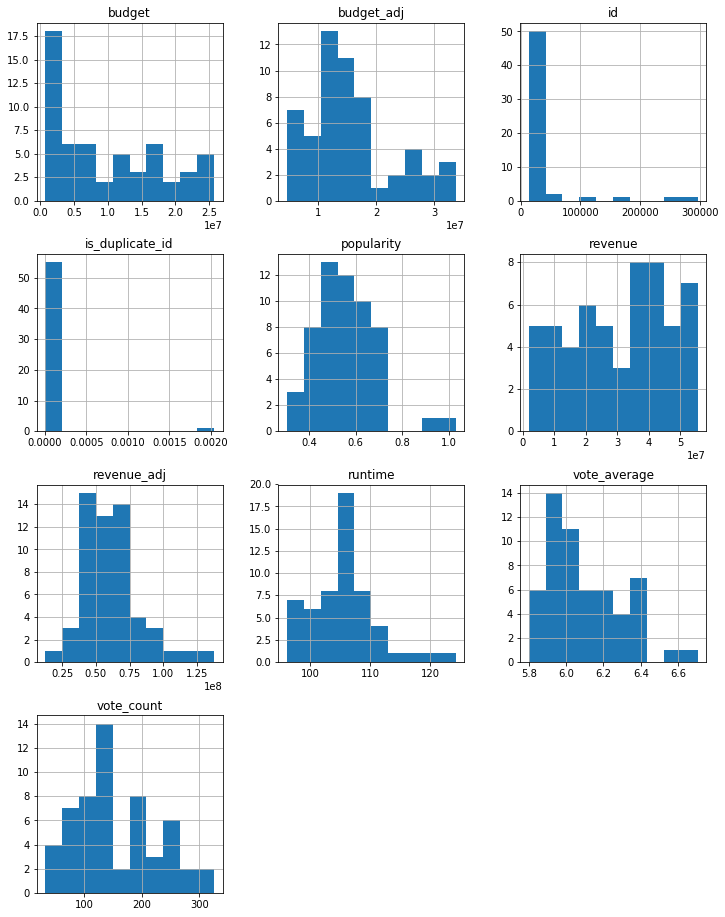

In [14]:
df_explore.hist(figsize=(12, 16));

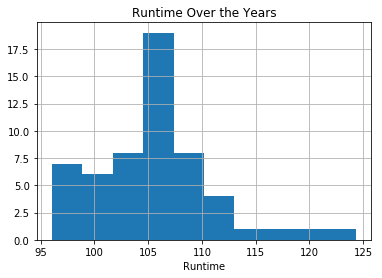

In [15]:
df_explore['runtime'].hist()
plt.xlabel('Runtime')
plt.title('Runtime Over the Years');

In [17]:
df_explore['runtime'].describe()

count     56.000000
mean     105.704864
std        5.522861
min       96.044006
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

    1.  As seen in the plots and functions above, popular runtimes over the years are between 104 and 107 minutes.


    2.  The distribution is right skewed.

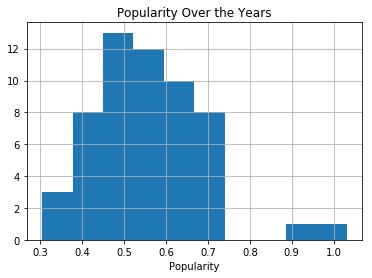

In [29]:
df_explore['popularity'].hist()
plt.xlabel('Popularity')
plt.title('Popularity Over the Years');


In [31]:
df_explore['popularity'].describe()

count    56.000000
mean      0.559549
std       0.128253
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626697
max       1.030657
Name: popularity, dtype: float64

    1.As evident from histogram and quartile percentages, maximum ratings received fall in the 0.47 to 0.62 ranges.

    2.The distribution is skewed to right.

    3.It is observed that no values lie in the range 0.73 to 0.89. This needs further scrutiny.

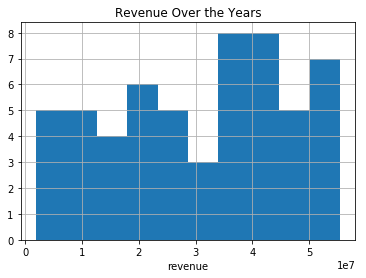

In [25]:
df_explore['revenue'].hist()
plt.xlabel('revenue')
plt.title('Revenue Over the Years');

In [26]:
df_explore['revenue'].describe()

count    5.600000e+01
mean     3.075231e+07
std      1.573047e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.255497e+07
75%      4.288089e+07
max      5.549569e+07
Name: revenue, dtype: float64

    1. the distribution is skewed to the left.

    2. Most movie revenues fall in the 3.257984e+07 to 4.293171e+07 ranges. `


## Conclusions:

In [ ]:
At the end of my cleaning and explorations;
1. Year 2014 had the highest number of release movies.
2. The same year 2014 The Hobbit: the battle of five armies had the most budget.
3. popular runtimes over the years are between 104 and 107 minutes.
4. Most movie revenues fall in the 3.257984e+07 to 4.293171e+07 ranges.

In [ ]:
REFRENCES:
    1. https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
        
    2. https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
        
    3. https://developers.themoviedb.org/3/getting-started/popularity
    
    4. https://prvnirupama.wordpress.com/2017/11/30/10-lessons-from-investigate-imdb-dataset/
        
    5. https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0